In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

left, right, freq = 0, 10, 100

def discretize(func, left, right, freq):
    x = [left + i / freq * (right - left) for i in range(1, freq + 1)]
    y = [func(x_i) for x_i in x]
    return x, y
        
def extend(ls):
    mod_size = 1
    while mod_size < len(ls):
        mod_size <<= 1
    if len(ls) < mod_size:
        ls.extend([0] * (mod_size - len(ls)))
    return ls

def real(z):
    return z.real
    
def fft(a, inverse=False):
    size = len(a)
    if size == 1:
        return a
    even = fft(a[::2], inverse)
    odd = fft(a[1::2], inverse)
    phi = 2 * math.pi / size * [1, -1][inverse]
    root = cmath.exp(1j*phi)
    curr = complex(1, 0)
    result = [0j] * size
    for i in range(size // 2):
        result[i] = even[i] + curr * odd[i]
        result[i + size // 2] = even[i] - curr * odd[i]
        curr *= root
        if inverse:
            result[i] /= 2
            result[i + size // 2] /= 2
    return result

def test(f, coefficients_deleted=0, name=None):
    if name == None:
        name = f.__name__
    x, y = discretize(f, left, right, freq)
    g = fft(extend(y[::]))
    
    plt.figlegend((plt.scatter(x, y, s=5),
                  plt.scatter(x, fft(extend(g[:len(g) - coefficients_deleted]), True)[:freq], s=5)),
                  (name, 'ifft(fft({})) with {} deleted coefficient(s)'.format(name, coefficients_deleted)))
    
    
    plt.grid(True)
    plt.show()

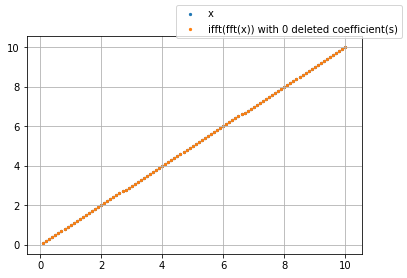

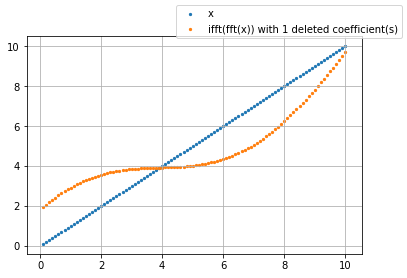

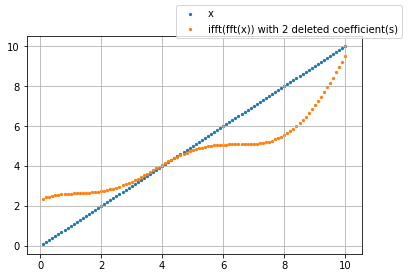

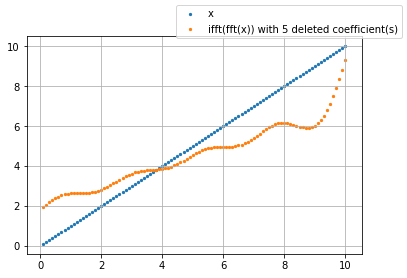

D = 0.78%


In [127]:
f = lambda x: x
name = 'x'
test(f, 0, name)
test(f, 1, name)
test(f, 2, name)
test(f, 5, name)
d = 1
print('D = {}%'.format(round(100*d/128, 2)))

Разница видна при D менее 1%

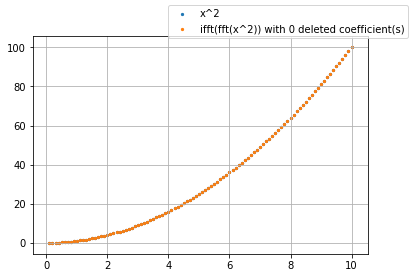

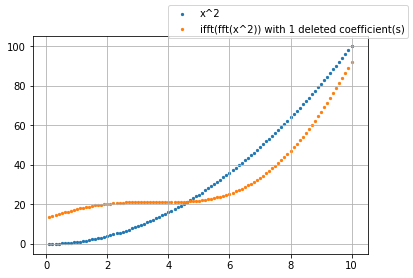

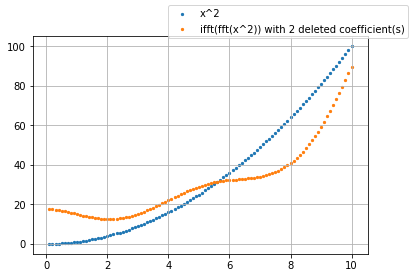

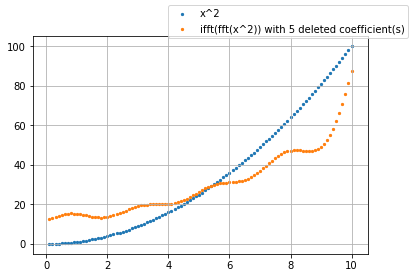

D = 0.78%


In [123]:
f = lambda x: x*x
name = 'x^2'
test(f, 0, name)
test(f, 1, name)
test(f, 2, name)
test(f, 5, name)
d = 1
print('D = {}%'.format(round(100*d/128, 2)))

Разница видна при D менее 1%

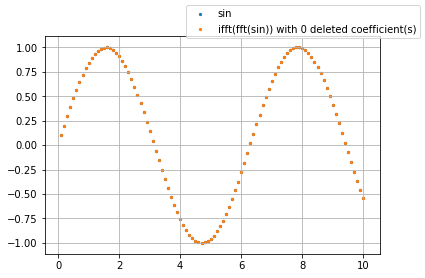

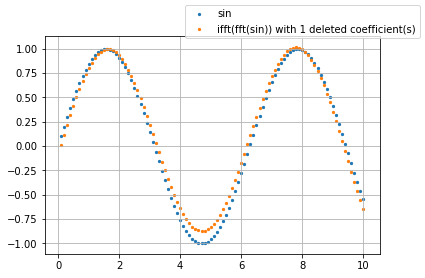

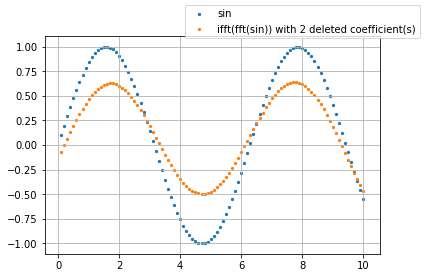

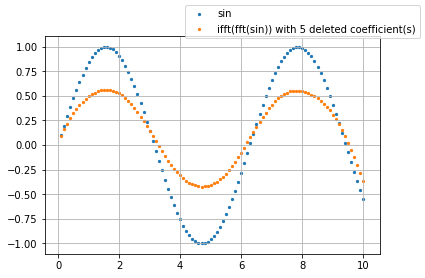

D = 0.78%


In [129]:
f = math.sin
test(f, 0)
test(f, 1)
test(f, 2)
test(f, 5)
d = 1
print('D = {}%'.format(round(100*d/128, 2)))

Разница видна при D менее 1%

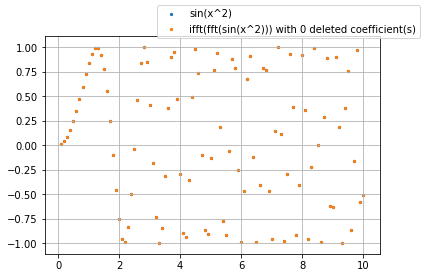

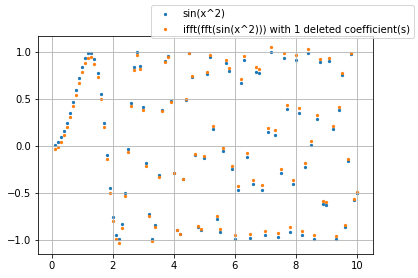

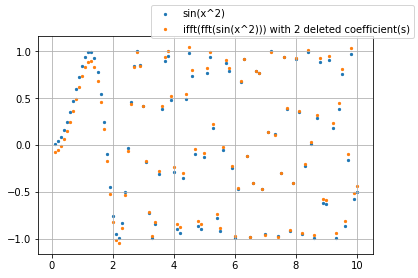

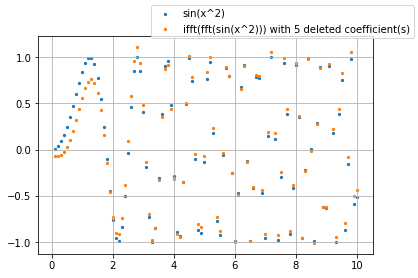

D = 0.78%


In [128]:
f = lambda x: math.sin(x * x)
name = 'sin(x^2)'
test(f, 0, name)
test(f, 1, name)
test(f, 2, name)
test(f, 5, name)
d = 1
print('D = {}%'.format(round(100*d/128, 2)))

Разница видна при D менее 1%

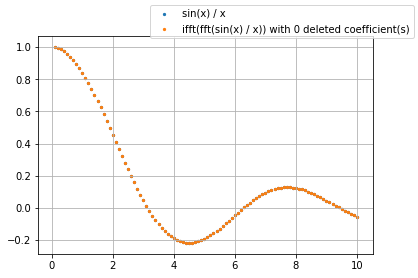

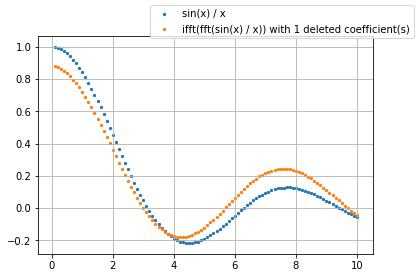

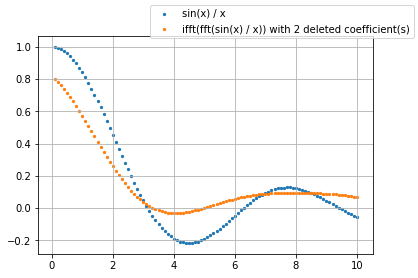

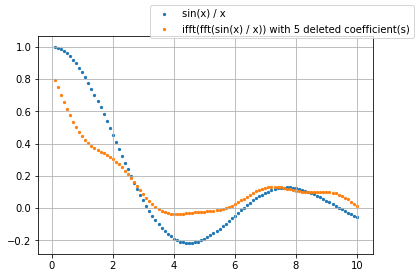

D = 0.78%


In [130]:
f = lambda x: math.sin(x) / x
name = 'sin(x) / x'
test(f, 0, name)
test(f, 1, name)
test(f, 2, name)
test(f, 5, name)
d = 1
print('D = {}%'.format(round(100*d/128, 2)))

Разница видна при D менее 1%